In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('book.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   url             1000 non-null   object 
 2   upc             1000 non-null   object 
 3   category        1000 non-null   object 
 4   product_type    1000 non-null   object 
 5   stars           1000 non-null   object 
 6   price_excl_tax  1000 non-null   float64
 7   price_incl_tax  1000 non-null   float64
 8   tax             1000 non-null   float64
 9   availability    1000 non-null   int64  
 10  num_reviews     1000 non-null   int64  
 11  description     998 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [100]:
# 1. reytingi yuqori kitoblarni korishlar soni ham kop boladi
# 2. reytingi yuqori bolgan kitoblarni narxi ham baland boaldi
# 3. Narxi arzon kitoblarni soni kam boladi
# 4. korishlar soni kop bolgan kitobni narxi ham baland
# 5. descriptioni uzun bolgan kitoblarni korishlar soni kop boladi 
# 6. Tax yuqori bolgan kitobni narxi ham yuqori
# 7. tax yuqori bolgan kitobni availability soni ham kop
# 8. descriptioni kop bolgan kitoblarni reyting soni kop boladi 

In [28]:
df['stars'].value_counts()

stars
one      226
three    203
two      196
five     196
four     179
Name: count, dtype: int64

In [29]:
def convert_stars(value):
    if value == 'one':
        return 1
    if value == 'two':
        return 2
    if value == 'three':
        return 3
    if value == 'four':
        return 4
    if value == 'five':
        return 5
    else:
        return 0

df['stars'] = df['stars'].apply(convert_stars)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   url             1000 non-null   object 
 2   upc             1000 non-null   object 
 3   category        1000 non-null   object 
 4   product_type    1000 non-null   object 
 5   stars           1000 non-null   int64  
 6   price_excl_tax  1000 non-null   float64
 7   price_incl_tax  1000 non-null   float64
 8   tax             1000 non-null   float64
 9   availability    1000 non-null   int64  
 10  num_reviews     1000 non-null   int64  
 11  description     998 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [31]:
df['stars'].value_counts()

stars
1    226
3    203
2    196
5    196
4    179
Name: count, dtype: int64

In [32]:
df['description'] = df['description'].fillna('No description')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   url             1000 non-null   object 
 2   upc             1000 non-null   object 
 3   category        1000 non-null   object 
 4   product_type    1000 non-null   object 
 5   stars           1000 non-null   int64  
 6   price_excl_tax  1000 non-null   float64
 7   price_incl_tax  1000 non-null   float64
 8   tax             1000 non-null   float64
 9   availability    1000 non-null   int64  
 10  num_reviews     1000 non-null   int64  
 11  description     1000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [ ]:
# 1

In [119]:
df['num_reviews'].quantile(0.5)

np.float64(0.0)

In [120]:
reviews_med = df['num_reviews'].quantile(0.5)

In [121]:
df[df['num_reviews'] >= reviews_med]['stars'].mean()

np.float64(2.923)

In [122]:
df[df['num_reviews'] <= reviews_med]['stars'].mean()

np.float64(2.923)

<Axes: xlabel='stars', ylabel='num_reviews'>

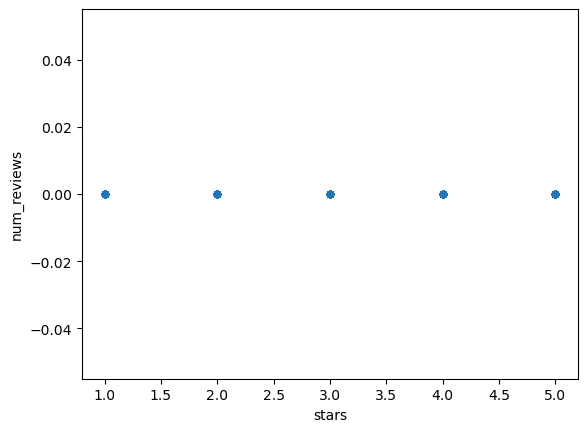

In [123]:
df.plot(x='stars', y='num_reviews', kind='scatter')

In [69]:
# 2

In [70]:
stars_med = df['stars'].quantile(0.5)

In [71]:
df[df['stars'] > stars_med]['price_incl_tax'].mean()

np.float64(35.717600000000004)

In [72]:
df[df['stars'] <= stars_med]['price_incl_tax'].mean()

np.float64(34.682)

<Axes: xlabel='stars', ylabel='price_incl_tax'>

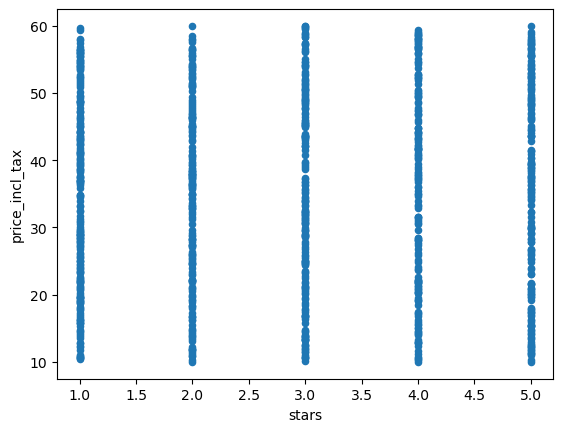

In [126]:
df.plot(x='stars', y='price_incl_tax', kind='scatter')

In [73]:
# 3

In [74]:
price_med = df['price_incl_tax'].quantile(0.5)

In [75]:
df[df['price_incl_tax'] < price_med]['availability'].mean()

np.float64(8.498)

In [76]:
df[df['price_incl_tax'] >= price_med]['availability'].mean()

np.float64(8.672)

<Axes: ylabel='Frequency'>

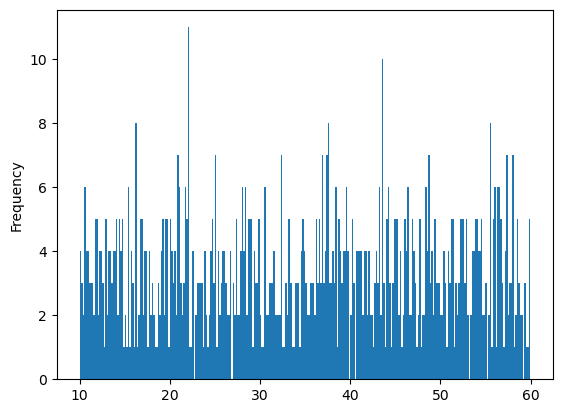

In [137]:
df['price_incl_tax'].plot(kind='hist', bins=300)

In [77]:
# 4

In [83]:
reviews_med = df['num_reviews'].quantile(0.5)

In [84]:
df[df['num_reviews'] >= reviews_med]['price_incl_tax'].mean()

np.float64(35.07035)

In [85]:
df[df['num_reviews'] <= reviews_med]['price_incl_tax'].mean()

np.float64(35.07035)

<Axes: xlabel='price_incl_tax', ylabel='num_reviews'>

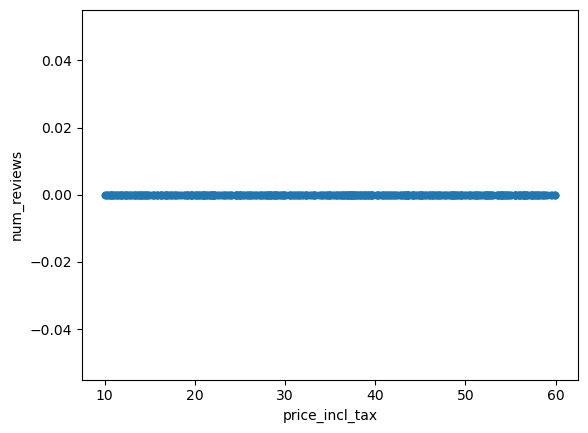

In [141]:
df.plot(x='price_incl_tax', y='num_reviews', kind='scatter')

In [88]:
# 5

In [93]:
df['desc_len'] = df['description'].str.len()

In [97]:
desc_med = df['desc_len'].quantile(0.5)

In [98]:
df[df['desc_len'] > desc_med]['num_reviews'].mean()

np.float64(0.0)

In [99]:
df[df['desc_len'] <= desc_med]['num_reviews'].mean()

np.float64(0.0)

<Axes: xlabel='num_reviews', ylabel='desc_len'>

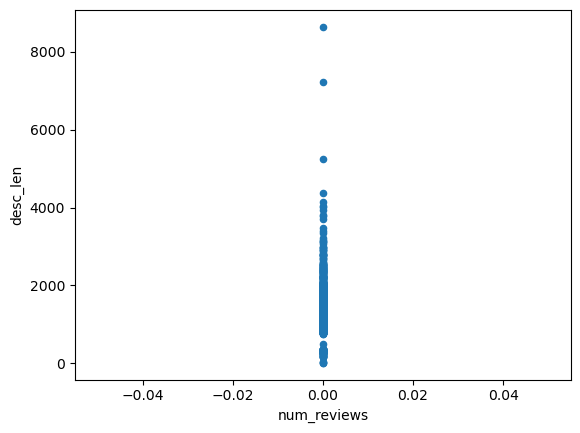

In [142]:
df.plot(x='num_reviews', y='desc_len', kind='scatter')

In [101]:
# 6

In [102]:
tax_med = df['tax'].quantile(0.5)

In [105]:
df[df['tax'] >= tax_med]['price_incl_tax'].mean()

np.float64(35.07035)

In [106]:
df[df['tax'] <= tax_med]['price_incl_tax'].mean()

np.float64(35.07035)

<Axes: xlabel='tax', ylabel='price_incl_tax'>

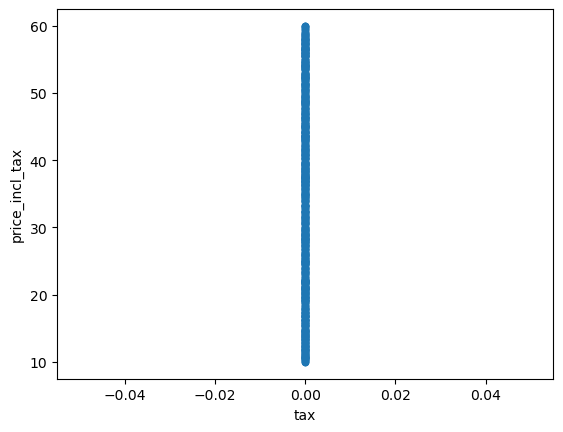

In [143]:
df.plot(x='tax', y='price_incl_tax', kind='scatter')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   url             1000 non-null   object 
 2   upc             1000 non-null   object 
 3   category        1000 non-null   object 
 4   product_type    1000 non-null   object 
 5   stars           1000 non-null   int64  
 6   price_excl_tax  1000 non-null   float64
 7   price_incl_tax  1000 non-null   float64
 8   tax             1000 non-null   float64
 9   availability    1000 non-null   int64  
 10  num_reviews     1000 non-null   int64  
 11  description     1000 non-null   object 
 12  desc_len        1000 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 101.7+ KB


In [107]:
# 7

In [109]:
quantity = df['availability'].quantile(0.5)

In [111]:
df[df['availability'] >= quantity]['tax'].mean()

np.float64(0.0)

In [112]:
df[df['availability'] < quantity]['tax'].mean()

np.float64(0.0)

<Axes: xlabel='tax', ylabel='availability'>

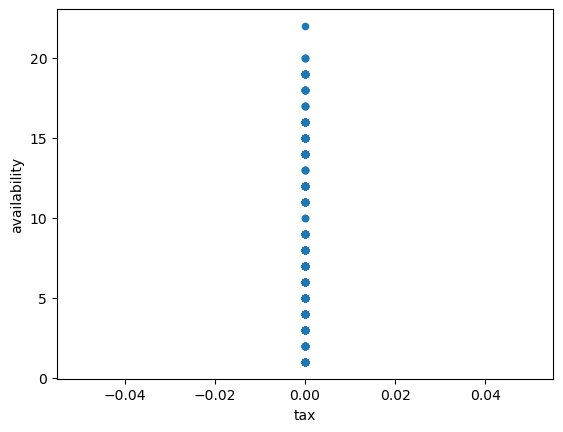

In [144]:
df.plot(x='tax', y='availability', kind='scatter')

In [114]:
# 8

In [115]:
df[df['desc_len'] > desc_med]['stars'].mean()

np.float64(2.926)

In [117]:
df[df['desc_len'] <= desc_med]['stars'].mean()

np.float64(2.92)

<Axes: xlabel='stars', ylabel='desc_len'>

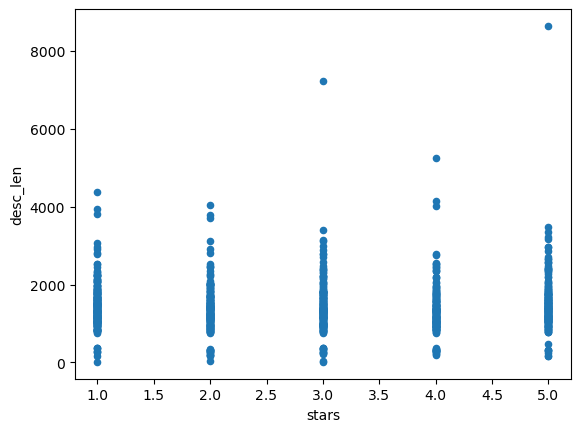

In [145]:
df.plot(x='stars', y='desc_len', kind='scatter')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   url             1000 non-null   object 
 2   upc             1000 non-null   object 
 3   category        1000 non-null   object 
 4   product_type    1000 non-null   object 
 5   stars           1000 non-null   int64  
 6   price_excl_tax  1000 non-null   float64
 7   price_incl_tax  1000 non-null   float64
 8   tax             1000 non-null   float64
 9   availability    1000 non-null   int64  
 10  num_reviews     1000 non-null   int64  
 11  description     1000 non-null   object 
 12  desc_len        1000 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 101.7+ KB


<Axes: ylabel='count'>

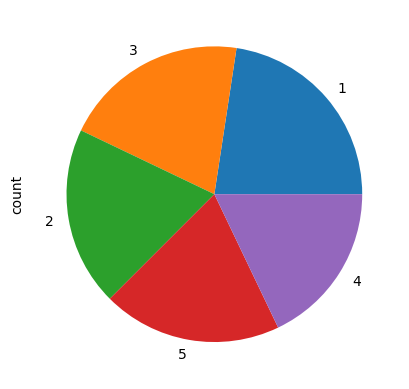

In [148]:
df['stars'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

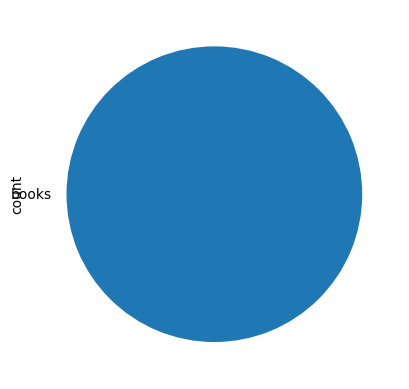

In [150]:
df['product_type'].value_counts().plot(kind='pie')